# Executive Summary of this EDA
#### 1. There are 3.5% duplicate rows in the dataset. So, first we will remove the duplicates 
#### 2.  Max_Clock_Speed will be extracted from the feature  - Clock_Speed. This feature has some missing values which will be replaced later with KNN inputer
#### 3. Max_Clock_Speed is a numerical feature which is normally distributed.
#### 4. Processor_Name is a categorical feature which will be encoded by target oriented ranking.
#### 5. In processor_Generation feature lot of missing values (39%) are there. So, this feature will be dropped.
#### 6. From RAM feature the RAM capacity will be extracted and it will be converted to numerical feature.
#### 7. In feature Graphic_Memory there are lot of missing values. These values are replaced with 0 assuming these laptops have no dedicated graphic memory. From other values the memory capacity is extracted and this feature is converted to a numerical feature.
#### 8.It is observed that each unique category of Graphic Processor has either all non-zero Graphic Memory or Zero Graphic memory. So, a Graphic Processor having all 0 graphic memory will be labeled as INTEGRATED and a category having all NON-ZERO memories will be labeled as DEDICATED.
#### 9. The Touchscreen feature has only two possible values Yes and No. Laptops having Touchscreen have more median price, so Yes will be encoded as 1 and NO as 0.
#### 10. From Screen_Size feature the size in CM is extracted and feature is converted to numerical feature.
#### 11. The Screen Resolution is converted to Total Pixels by multiplying the width and height. (e.g. 1080 x 1920 = 2,073,600)
#### 12. The Refresh Rate feature will be dropped as there are large number of missing values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import re

C:\Users\ARNAB\AppData\Local\Temp/ipykernel_7516/2067581281.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [ ]:
from google.colab import files
files.upload()

In [2]:
# Import the data
data_raw = pd.read_csv('train.csv', encoding= 'unicode_escape')
data_raw.head(5)

product_id                                       product_link  \
0  COMGZMKF3UAXVYU9  https://www.flipkart.com/product/p/item?pid=CO...   
1  COMGP24QHAAUK7JE  https://www.flipkart.com/product/p/item?pid=CO...   
2  COMGA5TUCZAV4HGH  https://www.flipkart.com/product/p/item?pid=CO...   
3  COMGZ3SPV5HJS79B  https://www.flipkart.com/product/p/item?pid=CO...   
4  COMGFHNGGWNDVGSY  https://www.flipkart.com/product/p/item?pid=CO...   

      Processor_Name Processor_Generation  \
0            Core i5             12th Gen   
1            Core i3             12th Gen   
2            Core i3             11th Gen   
3  Ryzen 3 Hexa Core                  NaN   
4            Core i5             11th Gen   

                                    Clock_Speed SSD_Capacity    RAM  \
0   3.3 GHz upto max turbo frequency at 4.4 Ghz       512 GB  16 GB   
1   0.9 GHz upto max turbo frequency at 4.4 Ghz       512 GB   8 GB   
2  3.0 GHz up to max turbo frequency at 4.1 GHz       512 GB   8 GB   
3         2.6 GHz with Turbo Boost Upto 3.8 GHz       512 GB   8 GB   
4   2.4 GHz upto max turbo frequency at 4.2 Ghz       512 GB   8 GB   

          Graphic_Processor Graphic_Memory Touchscreen           Screen_Size  \
0   NVIDIA GeForce RTX 3050           4 GB          No    40.64 cm (16 Inch)   
1      Intel Integrated UHD            NaN          No   90.32 cm (35.56 cm)   
2      Intel Integrated UHD            NaN          No  39.62 cm (15.6 Inch)   
3            AMD Radeon AMD            NaN          No  39.62 cm (15.6 Inch)   
4  Intel Integrated Iris Xe            NaN          No  39.62 cm (15.6 Inch)   

   Screen_Resolution Refresh_Rate   price  
0  1920 x 1200 Pixel       120 Hz  72,990  
1  1920 x 1080 Pixel          NaN  39,990  
2  1920 x 1080 Pixel          NaN  37,850  
3  1920 x 1080 Pixel          NaN  29,990  
4  1920 x 1080 Pixel          NaN  42,990

In [ ]:
# Size of the data
data_raw.shape

(981, 14)

## Initial Profiling of the Data

In [3]:
report = pp.ProfileReport(data_raw)
report.to_file('raw_data_profile.html')
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Univariate Analysis

## Price Variable

In [ ]:
data_raw['price'].dtype

dtype('O')

In [ ]:
def transform_price(data):
    temp = data.copy()
    temp['price'] = temp['price'].map(lambda x: float(x.replace(',','')))
    return temp

In [ ]:
data_raw = transform_price(data_raw)
data_raw.head(3)

product_id                                       product_link  \
0  COMGZMKF3UAXVYU9  https://www.flipkart.com/product/p/item?pid=CO...   
1  COMGP24QHAAUK7JE  https://www.flipkart.com/product/p/item?pid=CO...   
2  COMGA5TUCZAV4HGH  https://www.flipkart.com/product/p/item?pid=CO...   

  Processor_Name Processor_Generation  \
0        Core i5             12th Gen   
1        Core i3             12th Gen   
2        Core i3             11th Gen   

                                    Clock_Speed SSD_Capacity    RAM  \
0   3.3 GHz upto max turbo frequency at 4.4 Ghz       512 GB  16 GB   
1   0.9 GHz upto max turbo frequency at 4.4 Ghz       512 GB   8 GB   
2  3.0 GHz up to max turbo frequency at 4.1 GHz       512 GB   8 GB   

         Graphic_Processor Graphic_Memory Touchscreen           Screen_Size  \
0  NVIDIA GeForce RTX 3050           4 GB          No    40.64 cm (16 Inch)   
1     Intel Integrated UHD            NaN          No   90.32 cm (35.56 cm)   
2     Intel Integrated UHD            NaN          No  39.62 cm (15.6 Inch)   

   Screen_Resolution Refresh_Rate    price  
0  1920 x 1200 Pixel       120 Hz  72990.0  
1  1920 x 1080 Pixel          NaN  39990.0  
2  1920 x 1080 Pixel          NaN  37850.0

## Clock_Speed
### 1. From clock speed we will extract maximum GHz value and create a new feature Max_Clock_Speed
### 2. After transformation clock speed feature has 35 distinct values
### 3. With increase in clock speed price also increases
### 4. Max_Clock_Speed feature is normally distributed
### 5. Missing values will be replaced by KNN Imputer

In [ ]:
data_raw['Clock_Speed'].unique()[0:10]

array(['3.3 GHz upto max turbo frequency at 4.4 Ghz',
       '0.9 GHz upto max turbo frequency at 4.4 Ghz',
       '3.0 GHz up to max turbo frequency at 4.1 GHz',
       '2.6 GHz with Turbo Boost Upto 3.8 GHz',
       '2.4 GHz upto max turbo frequency at 4.2 Ghz',
       '1.7 GHz upto max turbo frequency at 4.1 Ghz',
       '3.0GHz with Turbo Boost Upto 4.1GHz', nan,
       'Base Frequency 1.7 GHz, Max Turbo Frequency at 4.1 GHz',
       'Up to 4.1 GHz'], dtype=object)

In [ ]:
def extract_max(string):
    try:
        pattern = r'[0-9].[0-9]'
        result = re.findall(pattern, string)
        result = [float(i) for i in result]
        return max(result)
    except:
        return None

def transform_clock_speed(data):
    temp = data.copy()
    temp['Max_Clock_Speed'] = temp['Clock_Speed'].map(extract_max)
    return temp

In [ ]:
data_raw = transform_clock_speed(data_raw)
total_unique = len(data_raw['Max_Clock_Speed'].unique())
print(f'After transformation Clock Speed has {total_unique} distinct values')

After transformation Clock Speed has 35 distinct values


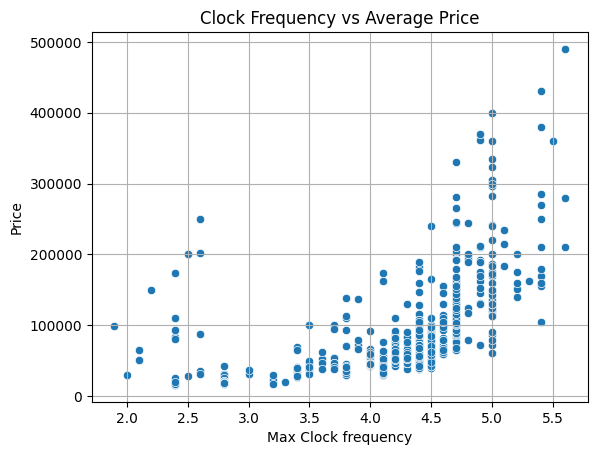

In [ ]:
## Relation with target variable
plot_data = data_raw.groupby('Max_Clock_Speed')['price'].median()
sns.scatterplot(data=data_raw, x='Max_Clock_Speed', y='price')
plt.xlabel('Max Clock frequency')
plt.ylabel('Price')
plt.title('Clock Frequency vs Average Price')
plt.grid()

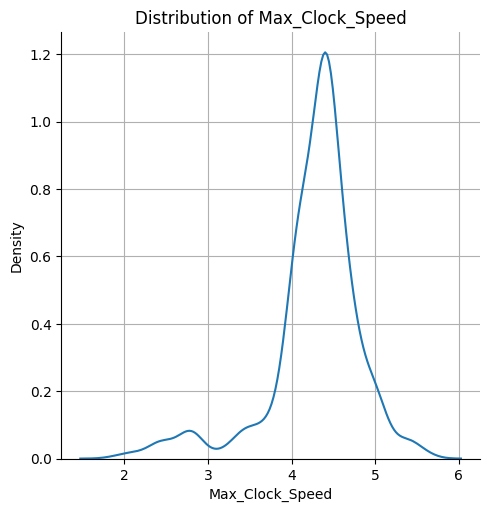

In [ ]:
# distribution of the feature
sns.displot(data_raw['Max_Clock_Speed'], kind='kde')
plt.title("Distribution of Max_Clock_Speed")
plt.grid()

In [ ]:
# Missing values 
missing = data_raw['Max_Clock_Speed'].isna().sum()
print(f'Total missing values - {missing}')

Total missing values - 117


## Processor_Name
### 1. Total 29 types of processors are present in dataset
### 2. There are no missing values in this feature
### 3. Price varies with Name of Processor - so target oriented encoding is required in this feature


In [ ]:
data_raw = data_raw
data_raw['Processor_Name'].unique()

array(['Core i5', 'Core i3', 'Ryzen 3 Hexa Core', 'M1',
       'Ryzen 5 Hexa Core', 'Celeron Dual Core', 'Athlon Dual Core',
       'Ryzen 7 Octa Core', 'Celeron Quad Core', 'Core i7',
       'Ryzen 3 Quad Core', 'Core i9', 'Snapdragon 7c Gen 2', 'M2 Max',
       'Ryzen 5 Quad Core', 'Ryzen 9 Octa Core', 'M2', 'Ryzen 9 16 Core',
       'M2 Pro', 'Ryzen 3 Dual Core', 'MediaTek Kompanio 500', 'M1 Pro',
       'Ryzen 5 Dual Core', 'M1 Max', 'Pentium Quad Core',
       'Ryzen 7 Quad Core', 'Ryzen 9 12 Core', 'MediaTek Kompanio 1200',
       'Ryzen 5 Octa Core'], dtype=object)

In [ ]:
total_processors = len(data_raw['Processor_Name'].unique())
print(f'Total numbers of processors - {total_processors}')

Total numbers of processors - 29


In [ ]:
total_missing = data_raw['Processor_Name'].isna().sum()
print(f'Total missing values - {total_missing}')

Total missing values - 0


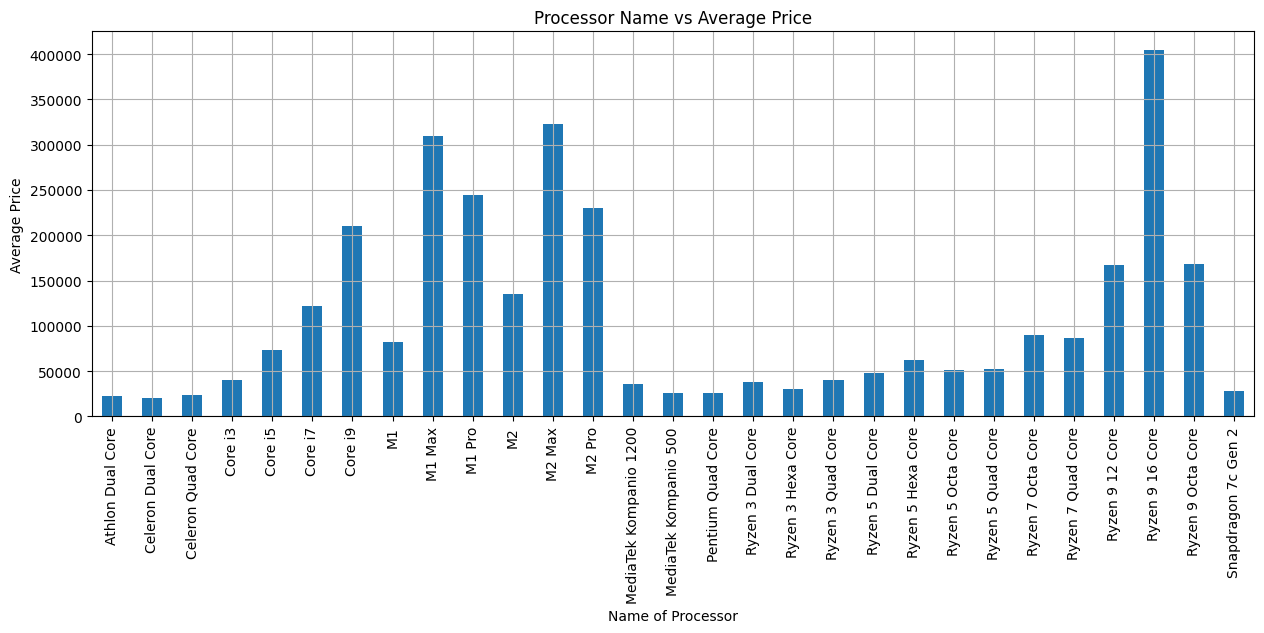

In [ ]:
plot_data = data_raw.groupby('Processor_Name')['price'].median()
plot_data.plot.bar(figsize=(15, 5))
plt.xlabel('Name of Processor')
plt.ylabel('Average Price')
plt.title('Processor Name vs Average Price')
plt.grid()

## Processor Generation - The feature will be dropped as there are large nos of missing values

In [ ]:
total_missing = data_raw['Processor_Generation'].isna().sum()
print(f'Total missing values - {total_missing}')

Total missing values - 382


## SSD Capacity
### 1. There are total 8 numbers of SSD capacity available
### 2. Price is different for different capacities of SSD - so target oriented encoding will be done
### 2. We will replace the missing values with NO_SSD. The laptops having no ssd have least median price
### 3. 16GB SSD size seems absurd. So, it will be replaced with most frequent value in the dataset.

In [ ]:
# Total unique values
total_unique = len(data_raw['SSD_Capacity'].unique())
total_missing = data_raw['SSD_Capacity'].isna().sum()
print(data_raw['SSD_Capacity'].unique())
print(f'Total unique values - {total_unique}')
print(f'Total missing values - {total_missing}')

['512 GB' '256 GB' nan '1 TB' '2 TB' '128 GB' '4 TB' '16 GB']
Total unique values - 8
Total missing values - 24


In [ ]:
def transform_SSD(data):
  temp = data.copy()
  temp['SSD_Capacity'] = temp['SSD_Capacity'].fillna('NO_SSD')
  return temp

In [ ]:
data_raw = transform_SSD(data_raw)

<Axes: xlabel='SSD_Capacity'>

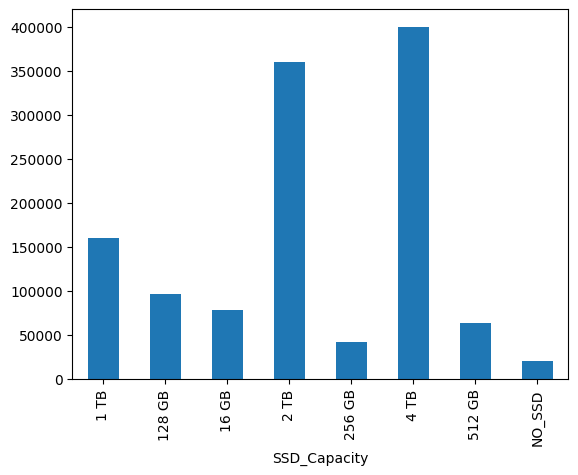

In [ ]:
# Relation of HDD capacity with target variable
data_raw.groupby('SSD_Capacity')['price'].median().plot.bar()

<Axes: xlabel='SSD_Capacity', ylabel='count'>

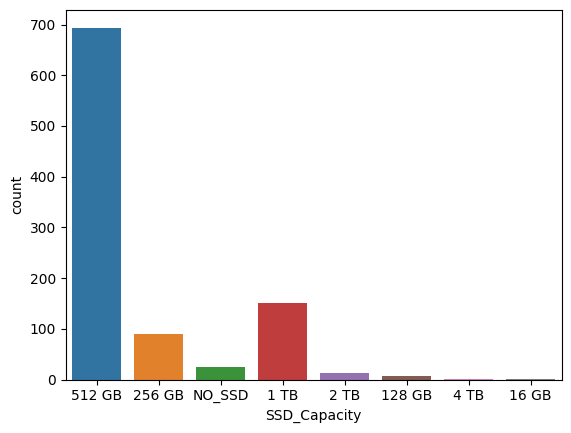

In [ ]:
sns.countplot(data_raw, x='SSD_Capacity')

In [ ]:
data_raw.loc[data_raw.SSD_Capacity == '16 GB', 'SSD_Capacity'] = '512 GB'

In [ ]:
data_raw['SSD_Capacity'].unique()

array(['512 GB', '256 GB', 'NO_SSD', '1 TB', '2 TB', '128 GB', '4 TB'],
      dtype=object)

## RAM
### 1. Total types - 5
### 2. Total missing values - 0
### 3. Price increases with increase in RAM size - so this feature will be converted to Numerical Feature

In [ ]:
# Total unique values
total_unique = len(data_raw['RAM'].unique())
total_missing = data_raw['RAM'].isna().sum()
print(data_raw['RAM'].unique())
print(f'Total unique values - {total_unique}')
print(f'Total missing values - {total_missing}')

['16 GB' '8 GB' '4 GB' '32 GB' '64 GB']
Total unique values - 5
Total missing values - 0


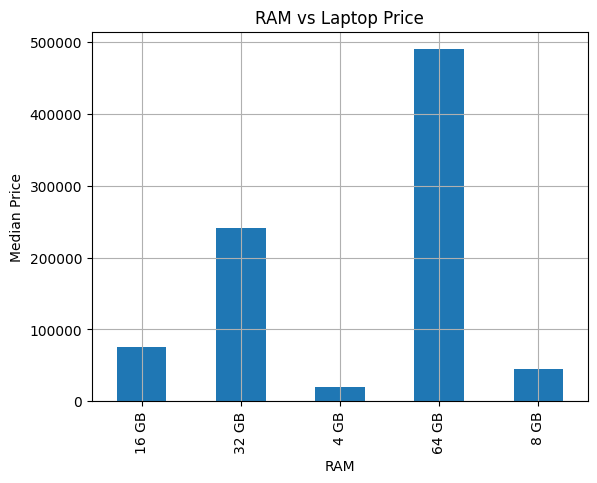

In [ ]:
data_raw.groupby('RAM')['price'].median().plot.bar()
plt.title("RAM vs Laptop Price")
plt.ylabel('Median Price')
plt.grid()

In [ ]:
def transform_RAM(data):
  temp = data.copy()
  temp['RAM'] = temp['RAM'].map(lambda x: int(x.split(' ')[0]))
  return temp

In [ ]:
data_raw = transform_RAM(data_raw)
data_raw['RAM'].unique()

array([16,  8,  4, 32, 64])

## Graphic Processor and Graphic Memory
### 1. Graphic processor has high cardinality and missing values also missing values
### 2. Graphic Memory has large numbers of missing values
### 3. Graphic Memory NaN values will be replaced with NO_GRAPHIC_MEMORY first. 
### 4. It is observed that laptops with more graphic memory have more median price. So, the feature will be converted to Numerical and NO_GRAPHIC_MEMORY values will be replaced with 0.
### 5. Graphic Processor having NaN values will be replaced with NO_GRAPHIC_CARD first
### 6. It is observed that each category of Graphic Processor has either all non-zero Graphic Memory or Zero Graphic memory. So, a cateory having all 0 graphic memory will be labeled as INTEGRATED and a category having all NON-ZERO memories will be labeled as DEDICATED

In [ ]:
# Graphic Processor
total_types = data_raw['Graphic_Processor'].unique()
total_miss = data_raw['Graphic_Processor'].isna().sum()
print('Graphic Proessors')
print(f'Total types - {len(total_types)}')
print(f'Total missing - {total_miss}')

Graphic Proessors
Total types - 114
Total missing - 34


In [ ]:
# Graphic Processor
total_types = data_raw['Graphic_Memory'].unique()
total_miss = data_raw['Graphic_Memory'].isna().sum()
print('Graphic Memory')
print(f'Types  - {total_types}')
print(f'Total types - {len(total_types)}')
print(f'Total missing - {total_miss}')

Graphic Memory
Types  - ['4 GB' nan '8 GB' '12 GB' '6 GB' '10 GB' '16 GB' '2 GB']
Total types - 8
Total missing - 599


In [ ]:
def transform_graphic_memory(data):
  temp = data.copy()
  temp['Graphic_Memory'].fillna('NO_GRAPHIC_MEMORY', inplace=True)
  return temp

<Axes: xlabel='Graphic_Memory'>

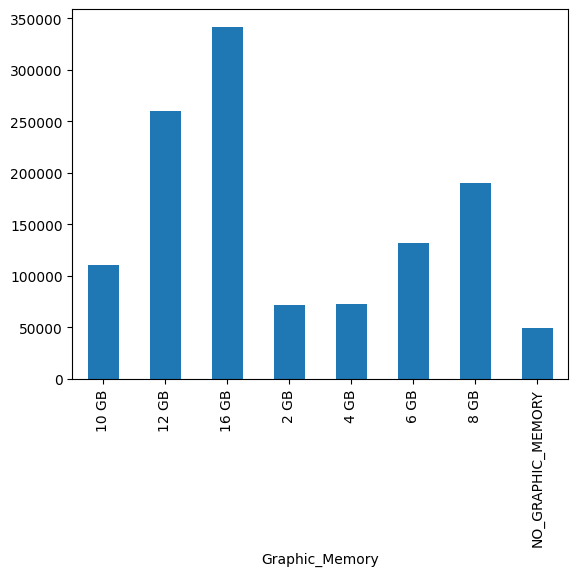

In [ ]:
temp = transform_graphic_memory(data_raw)
temp.groupby('Graphic_Memory')['price'].median().plot.bar()

In [ ]:
def transform_graphic_memory_1(data):
  temp = data.copy()
  temp['Graphic_Memory'].fillna('0 GB', inplace=True)
  temp['Graphic_Memory'] = temp['Graphic_Memory'].map(lambda x: int(x.split(' ')[0]))
  return temp

In [ ]:
data_raw = transform_graphic_memory_1(data_raw)
data_raw['Graphic_Memory'].unique()

array([ 4,  0,  8, 12,  6, 10, 16,  2])

In [ ]:
def transform_graphic_card(data):
  temp = data.copy()
  temp['Graphic_Processor'].fillna('NO_GRAPHIC_CARD', inplace=True)
  return temp

In [ ]:
data_raw = transform_graphic_card(data_raw)
data_raw['Graphic_Processor'].isna().sum()

0

Text(0.5, 9.444444444444438, 'Percentage of Zero Values')

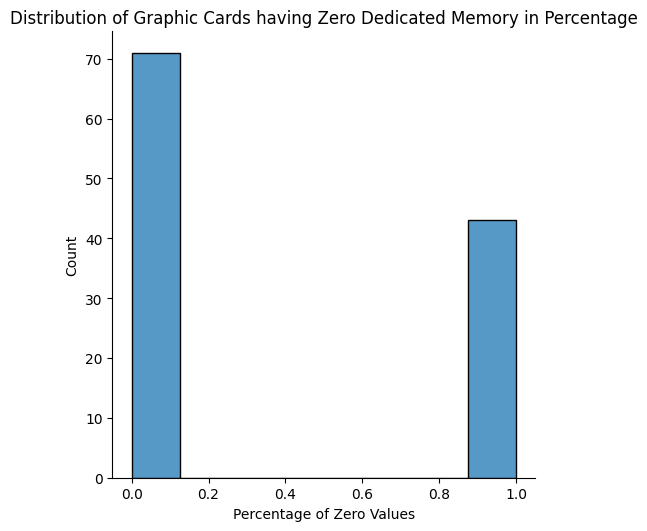

In [ ]:
percent_zeroes = []

for processor in data_raw['Graphic_Processor'].unique():
  zeroes = data_raw[(data_raw.Graphic_Processor == processor)&(data_raw.Graphic_Memory == 0)].shape[0]
  non_zeroes = data_raw[(data_raw.Graphic_Processor == processor)&(data_raw.Graphic_Memory != 0)].shape[0]
  percent = (zeroes)/(zeroes + non_zeroes)
  percent_zeroes.append(percent)

sns.displot(percent_zeroes, kind='hist')
plt.title("Distribution of Graphic Cards having Zero Dedicated Memory in Percentage")
plt.xlabel("Percentage of Zero Values")  
  # if percent > 0.5:
  #   cat_wise_type[processor] = 'INTEGRATED'
  # else:
  #   cat_wise_type[processor] = 'DEDICATED' 

In [ ]:
def transform_graphic_card_1(data):
  temp = data.copy()
  category_map = {}

  for processor in temp['Graphic_Processor'].unique():
    zeroes = temp[(temp.Graphic_Processor == processor)&(temp.Graphic_Memory == 0)].shape[0]
    non_zeroes = temp[(temp.Graphic_Processor == processor)&(temp.Graphic_Memory != 0)].shape[0]
    percent = (zeroes)/(zeroes + non_zeroes)
    
    if percent > 0.8:
      category_map[processor] = 'INTEGRATED'

    else:
      category_map[processor] = 'DEDICATED'
  
  temp['Graphic_Processor_Type'] = temp['Graphic_Processor'].map(lambda x: category_map[x])
  return temp


In [ ]:
data_raw = transform_graphic_card_1(data_raw)
data_raw[['Graphic_Processor','Graphic_Memory', 'Graphic_Processor_Type']].head(5)

Graphic_Processor  Graphic_Memory Graphic_Processor_Type
0   NVIDIA GeForce RTX 3050               4              DEDICATED
1      Intel Integrated UHD               0             INTEGRATED
2      Intel Integrated UHD               0             INTEGRATED
3            AMD Radeon AMD               0             INTEGRATED
4  Intel Integrated Iris Xe               0             INTEGRATED

## Touchscreen
### 1. No missing values in this feature
### 2. Presence of Touchscreen will attract more price
### 3. So, if value is 'Yes' it will  be encoded as 1 and if 'No' then 0
### 4. Not norally distributed

In [ ]:
values  = data_raw['Touchscreen'].unique()
missing = data_raw['Touchscreen'].isna().sum()
print('In feature Touchscreen')
print(f'Total types - {values}')
print(f'Total missing - {missing}')

In feature Touchscreen
Total types - ['No' 'Yes']
Total missing - 0


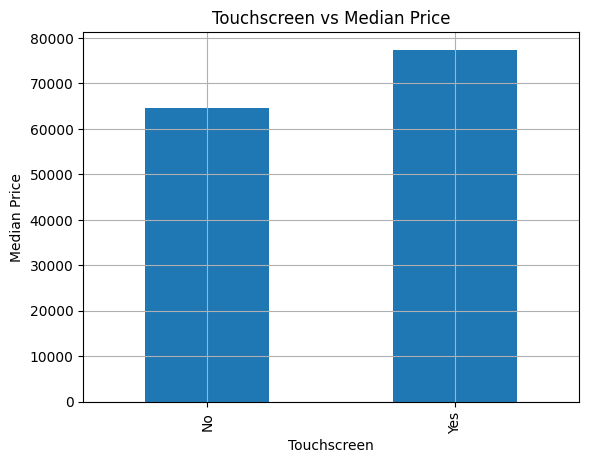

In [ ]:
data_raw.groupby('Touchscreen')['price'].median().plot.bar()
plt.title('Touchscreen vs Median Price')
plt.ylabel('Median Price')
plt.grid()

## Screen Size
### 1. No missing values
### 2. Screen size is converted to CM value
### 3. There is not much variance in this feature. Max screen size is 45.7 CM and minimum size is 26.67 CM
### 4. There not much co-relation between screen size and laptop price

In [ ]:
missing = data_raw['Screen_Size'].isna().sum()
print(f'Total missing values is be {missing}')

Total missing values is be 0


In [ ]:
def transform_screen_size(data):

  def extract_cm_value(string):
    pattern = r'[0-9]+\.*[0-9]*(?=\s*cm)'
    res = re.findall(pattern=pattern, string=string)
    res = pd.Series(res)
    res = res.map(lambda x: float(x))
    return min(res)

  temp = data.copy()
  temp['Screen_Size'] = temp['Screen_Size'].map(extract_cm_value)
  return temp

In [ ]:
data_raw = transform_screen_size(data_raw)
data_raw['Screen_Size'].describe()
# sns.displot(temp['Screen_Size'])

count    981.000000
mean      38.337166
std        2.525017
min       26.670000
25%       35.560000
50%       39.620000
75%       39.620000
max       45.720000
Name: Screen_Size, dtype: float64

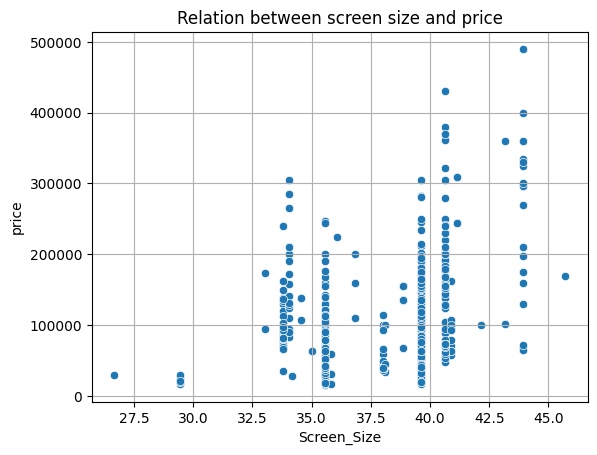

In [ ]:
sns.scatterplot(data=data_raw, x='Screen_Size', y='price')
plt.title('Relation between screen size and price')
plt.grid()

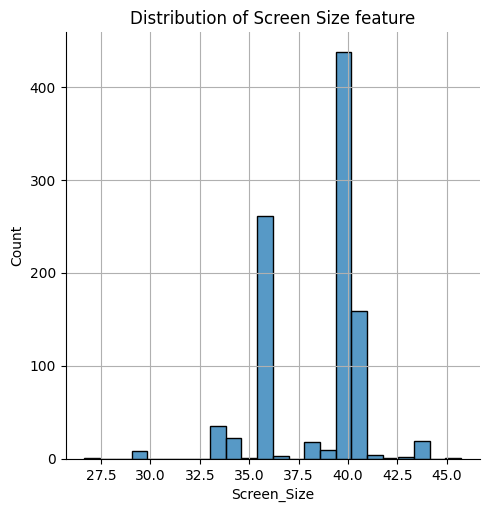

In [ ]:
sns.displot(data=data_raw, x='Screen_Size')
plt.title("Distribution of Screen Size feature")
plt.grid()

## Screen Resolution
### 1. No missing values
### 2. Screen resolution is converted to Total Pixel available
### 3. There is positive co-relation between Total Pixel vs Median Price

In [ ]:
missing = data_raw['Screen_Resolution'].isna().sum()
print('In feature Screen Resolution')
print(f'Total missing values - {missing}')


In feature Screen Resolution
Total missing values - 0


In [ ]:
def transform_resolution(data):
  def find_total_pixel(string):
    pattern = r'([0-9]{3,4})[^0-9]+([0-9]{3,4})'
    res = re.findall(pattern, string)
    res = res[0]
    return int(res[0])*int(res[1])

  temp = data.copy()
  temp.loc[data_raw.Screen_Resolution == '1080p pixel', 'Screen_Resolution']= '1080 x 1920'
  temp['Total_Pixel'] = temp['Screen_Resolution'].map(find_total_pixel)
  return temp



In [ ]:
data_raw = transform_resolution(data_raw)
data_raw[['Screen_Resolution', 'Total_Pixel' ]]

Screen_Resolution  Total_Pixel
0    1920 x 1200 Pixel      2304000
1    1920 x 1080 Pixel      2073600
2    1920 x 1080 Pixel      2073600
3    1920 x 1080 Pixel      2073600
4    1920 x 1080 Pixel      2073600
..                 ...          ...
976  2880 x 1800 pixel      5184000
977  1920 x 1080 pixel      2073600
978  1920 x 1080 pixel      2073600
979  1920 x 1080 Pixel      2073600
980  1920 x 1200 pixel      2304000

[981 rows x 2 columns]

Text(0.5, 1.0, 'Total Pixel vs Median Price')

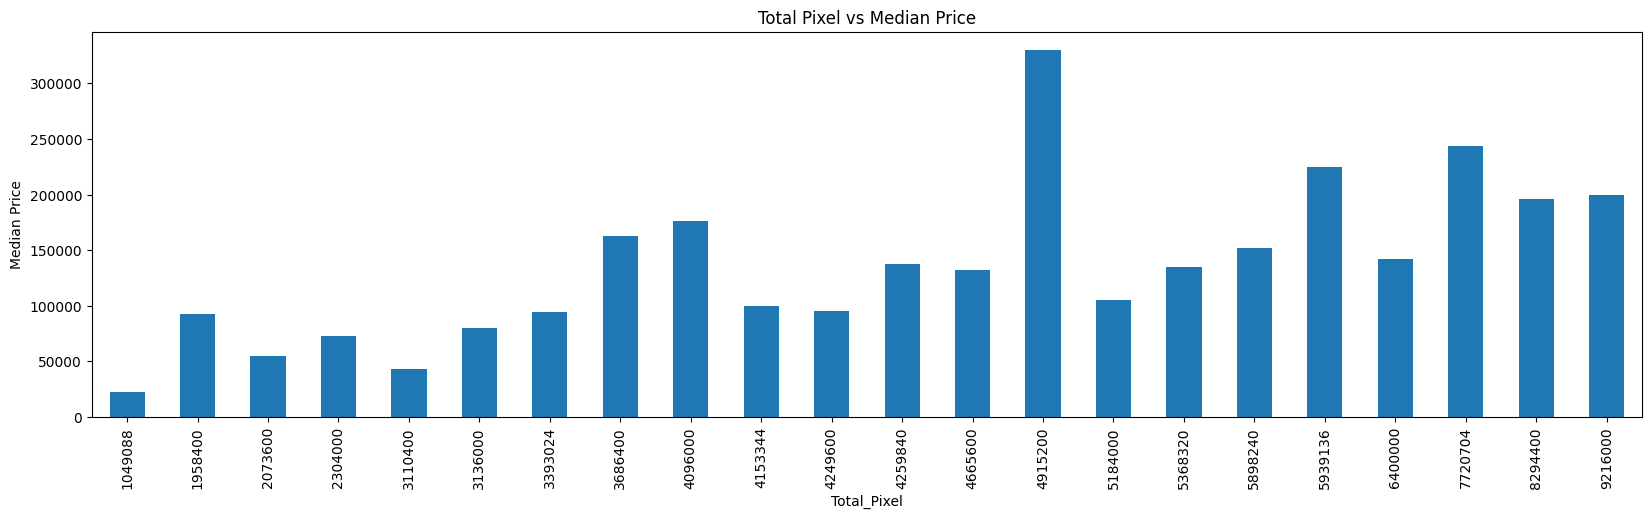

In [ ]:
data_raw.groupby('Total_Pixel')['price'].median().plot.bar(figsize=(20,5))
plt.ylabel('Median Price')
plt.title('Total Pixel vs Median Price')

## Refresh_Rate	 - Feature will be dropped because of large number of missing values

In [ ]:
missing = data_raw['Refresh_Rate'].isna().sum()
print(f'Total missing values are - {missing}')

Total missing values are - 753
